## 1. Load and Preprocess the MNIST Dataset

(60000, 28, 28)
Training data shape: (60000, 784)
Test data shape: (10000, 784)


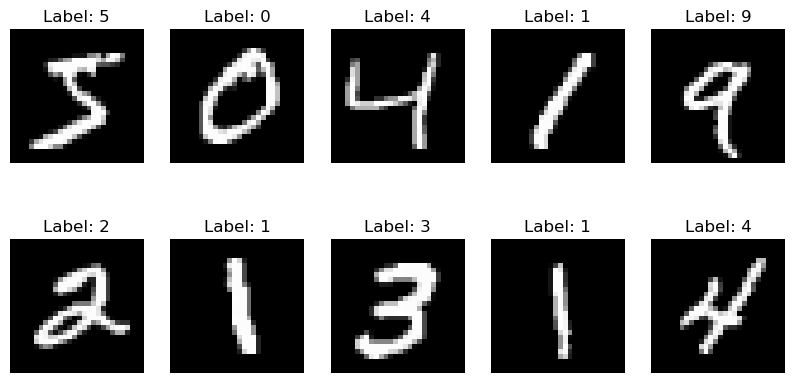

In [1]:
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
import matplotlib.pyplot as plt

#Comment: the data is being taken from the dataset, then split into training and test X and y data
    # the shape of the X for the training data is then printed to show its structure
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)

#Comment: the X is being turned into float values and divided by 255
    # because they are out of 255 originally, this gets the numbers as a fraction to be able to visually represent them better
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

#Comment: the data is being reshaped so it is no longer two arrays
    # it originally was two arrays due to being a 28 by 28 grid, but this allows for it to be processed by the neural network model
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)


print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

#Comment: the data is being visualized
    # it is reshaped again into 28 by 28 so it can be shown as this grid, then it is labeled with the correct number
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()


In [2]:
#!pip install tensorflow

## Build the Neural Network Model

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input

# Build the neural network model
#Write you code here. Define "model" using Sequential, Input and Dense
model = Sequential([
    Input(shape=(28*28,)),
    Dense(512, activation="relu"),
    Dense(512, activation="relu"),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

## Train the Neural Network

Epoch 1/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9082 - loss: 0.2918 - val_accuracy: 0.9591 - val_loss: 0.1312
Epoch 2/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9716 - loss: 0.0907 - val_accuracy: 0.9771 - val_loss: 0.0771
Epoch 3/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9811 - loss: 0.0600 - val_accuracy: 0.9737 - val_loss: 0.0917
Epoch 4/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9863 - loss: 0.0447 - val_accuracy: 0.9651 - val_loss: 0.1917
Epoch 5/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9873 - loss: 0.0419 - val_accuracy: 0.9776 - val_loss: 0.0886
Epoch 6/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9899 - loss: 0.0309 - val_accuracy: 0.9771 - val_loss: 0.0993
Epoch 7/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9925 - loss: 0.0261 - val_accuracy: 0.9797 - val_loss: 0.0990
Epoch 8/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9926 - loss: 0

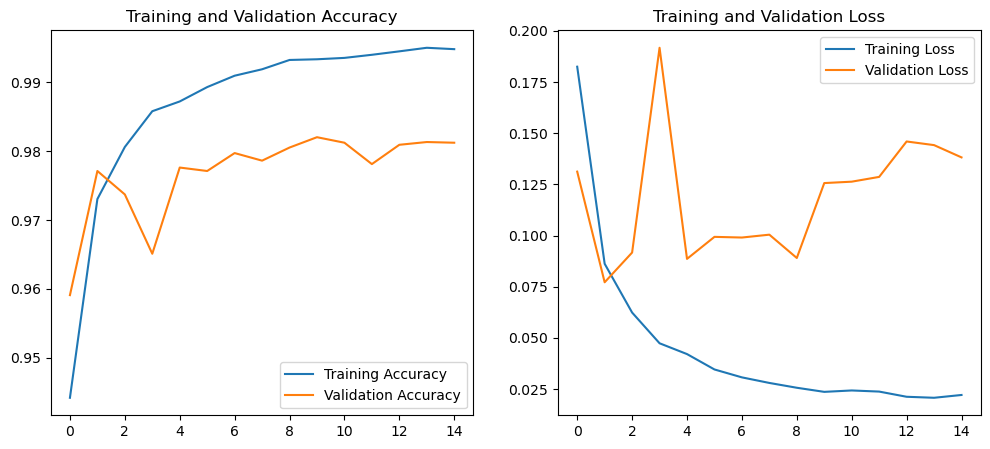

In [4]:
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

#Comment: the model is being created originally, with the accurary metric being determined
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Comment: a checkpoint is being made of the model so that the best model can later be recalled
checkpoint = ModelCheckpoint('best_model.keras', save_best_only = True, monitor = 'val_accuracy', mode = 'max')

#Comment: the model is being fitted to the data, being fed both the training and test data
    # as part of training, the number of epochs and size of a batch are set to a relatively low 10 epoches
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 15, batch_size = 16, callbacks = [checkpoint])

#Comment: the model's accuracy is being graphed, both in training and in validation
    # accuracy measures what fraction of the predictions were correct
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

#Comment: the model's loss is being graphed, both in training and in validation
    # loss measures how wrong the model was overall
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


## Evaluate the Model

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - accuracy: 0.9789 - loss: 0.1646
Test Accuracy: 0.9820
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.96      0.99      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



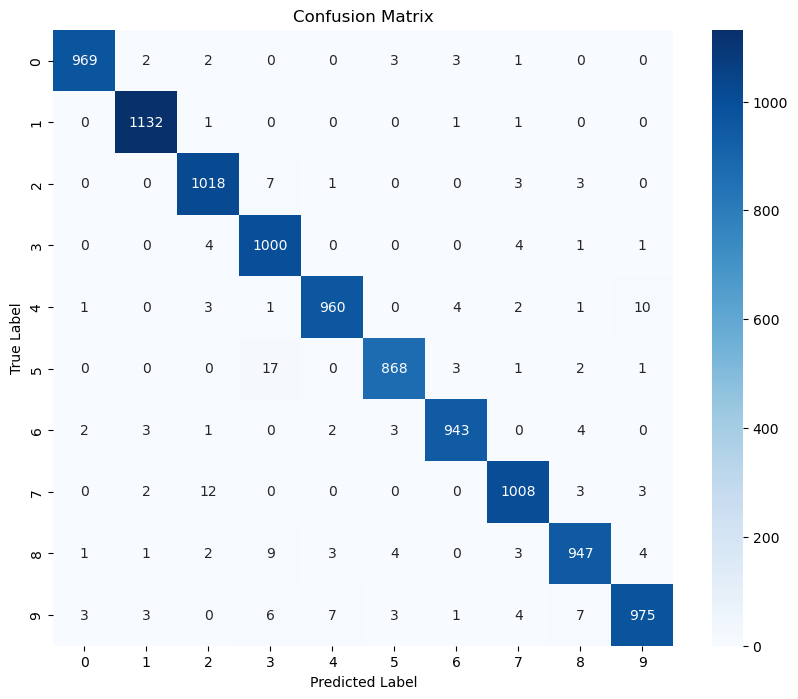

In [5]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


best_model = tf.keras.models.load_model('best_model.keras')

#Comment: the loss and accuracy of the best model are found and printed
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

#Comment: a prediction is actually being made
y_pred = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes))

#Comment: a confusion matrix is found
    # this shows the success of the model with each of the possible numbers
cm = confusion_matrix(y_test, y_pred_classes)

#Comment: the confusion matrix is graphed
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(10)])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## Visualize Predictions

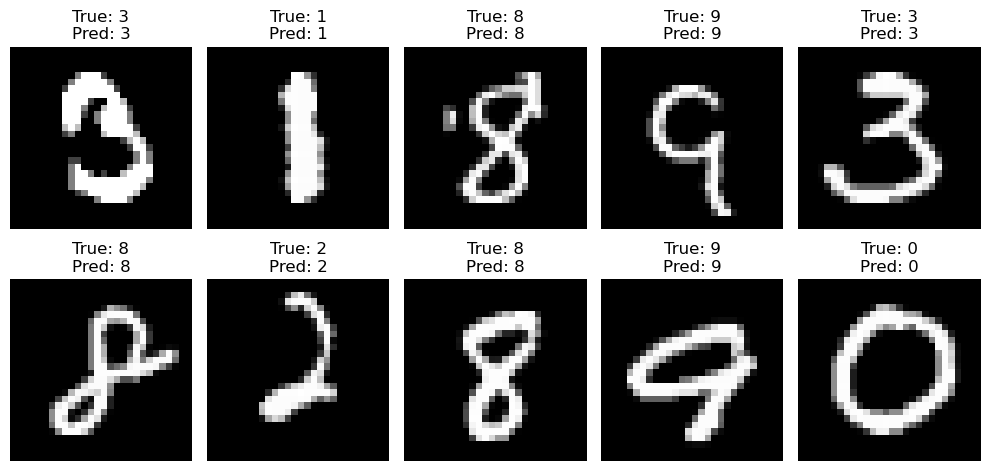

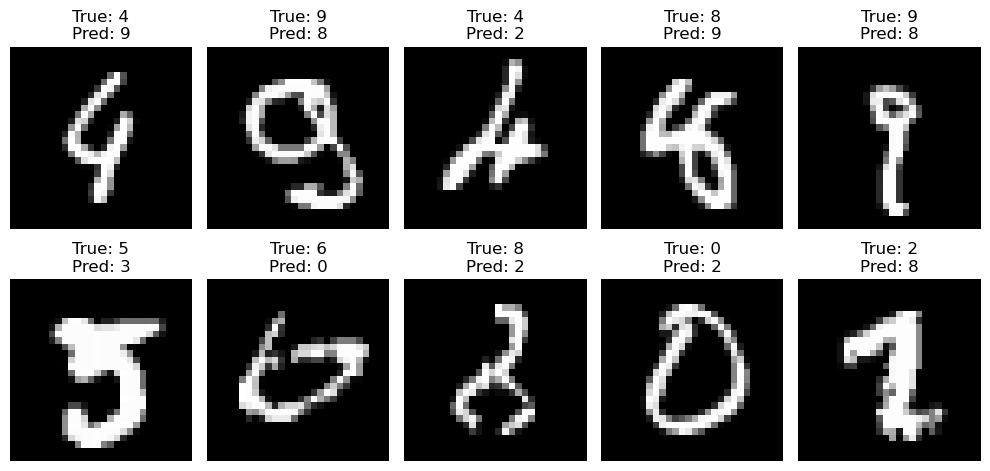

In [6]:
#Comment: 10 random values are found to give a sample of the model's performance
indices = np.random.choice(len(X_test), 10, replace=False)

#Comment: the random values are displayed with labels
plt.figure(figsize=(10, 5))
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[idx]}\nPred: {y_pred_classes[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

#Comment: any indices where the model was wrong are added to an array
incorrect_indices = np.where(y_test != y_pred_classes)[0]

#Comment: the incorrect indices are displayed
plt.figure(figsize=(10, 5))
for i, idx in enumerate(incorrect_indices[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[idx]}\nPred: {y_pred_classes[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
